<a href="https://colab.research.google.com/github/Claudia060392/Portafolio-Ciencia-de-Datos/blob/main/Practicas%20Consolidadas/Modulo_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

# Carga del archivo manualmente
archivo = files.upload()

# Lectura del CSV
df = pd.read_csv("cambio_climatico_agricultura.csv")

# Primeras filas
print(df.head())

Saving cambio_climatico_agricultura.csv to cambio_climatico_agricultura.csv
        País  Temperatura_promedio  Cambio_lluvias  Frecuencia_sequías  \
0   Alemania                  10.5              -5                   2   
1  Argentina                  17.8             -10                   5   
2  Australia                  22.3             -15                   8   
3     Brasil                  25.1              -8                   6   
4     Canadá                   6.2              -2                   1   

   Producción_alimentos  
0                950000  
1                650000  
2                400000  
3                900000  
4                850000  


Dimensiones: (23, 5)
Columnas: ['País', 'Temperatura_promedio', 'Cambio_lluvias', 'Frecuencia_sequías', 'Producción_alimentos']

[LinearRegression]  MAE=178682.6887 | MSE=44005458805.0369 | R²=-0.2710

[DecisionTreeRegressor]  MAE=166000.0000 | MSE=35780000000.0000 | R²=-0.0334

[RandomForestRegressor(100)]  MAE=171360.0000 | MSE=36232036000.0000 | R²=-0.0464

[Ridge(alpha=1.0)]  MAE=179269.3482 | MSE=44292160966.1449 | R²=-0.2792

Mejor regresor por MSE: DecisionTreeRegressor  ->  MSE=35780000000.0000, R²=-0.0334


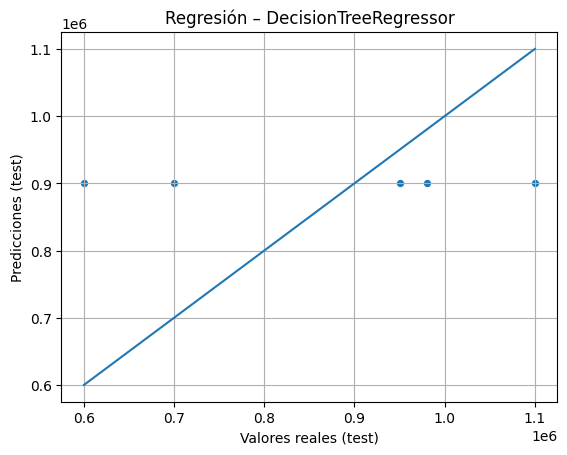


[KNN(n=5)]  Accuracy=0.4000 | Precision(macro)=0.5000 | Recall(macro)=0.3333 | F1(macro)=0.3889


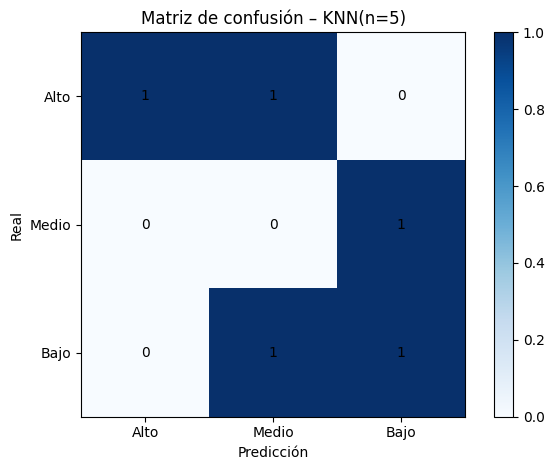

ROC-AUC(macro, OVR): 0.5000

[DecisionTreeClassifier]  Accuracy=0.4000 | Precision(macro)=0.5000 | Recall(macro)=0.3333 | F1(macro)=0.3889


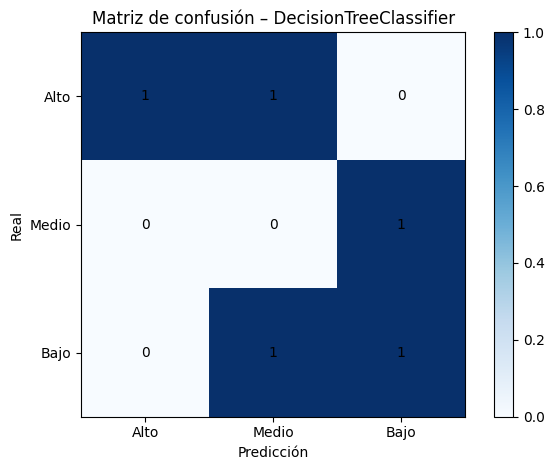

ROC-AUC(macro, OVR): 0.5278

[SVC RBF (prob)]  Accuracy=0.6000 | Precision(macro)=0.3889 | Recall(macro)=0.5000 | F1(macro)=0.4333


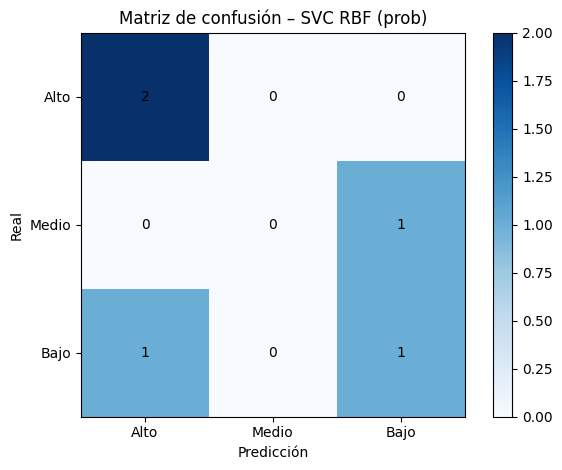

ROC-AUC(macro, OVR): 0.5278

[LogisticRegression]  Accuracy=0.6000 | Precision(macro)=0.4444 | Recall(macro)=0.6667 | F1(macro)=0.5000


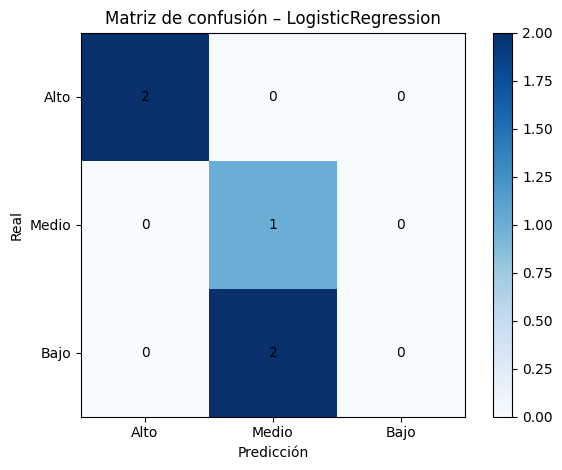

ROC-AUC(macro, OVR): 0.7778

Mejor clasificador por F1 macro: LogisticRegression  ->  F1=0.5000

GridSearch RandomForestRegressor -> mejor: {'n_estimators': 200}   MSE(cv): 17662793291.666664
GridSearch SVC -> mejor: {'C': 1.0, 'gamma': 'scale'}   F1_macro(cv): 0.5199999999999999

Resumen Regresión:
                       Modelo            MAE           MSE        R2
0       DecisionTreeRegressor  166000.000000  3.578000e+10 -0.033387
1  RandomForestRegressor(100)  171360.000000  3.623204e+10 -0.046443
2            LinearRegression  178682.688750  4.400546e+10 -0.270952
3            Ridge(alpha=1.0)  179269.348173  4.429216e+10 -0.279233

Resumen Clasificación:
                   Modelo  Accuracy  Precision_macro  Recall_macro  F1_macro
0      LogisticRegression       0.6         0.444444      0.666667  0.500000
1          SVC RBF (prob)       0.6         0.388889      0.500000  0.433333
2  DecisionTreeClassifier       0.4         0.500000      0.333333  0.388889
3                KNN(n

In [2]:
# Práctica Consolidada – Módulo 6

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score
)

# ------------------------------------------
# Inspección breve para verificación
# ------------------------------------------
print("Dimensiones:", df.shape)
print("Columnas:", list(df.columns))

# ------------------------------------------
# 1) Limpieza mínima (media para numéricos, moda para categóricos)
# ------------------------------------------
col_pais = "País"
col_temp = "Temperatura_promedio"
col_lluv = "Cambio_lluvias"
col_seqs = "Frecuencia_sequías"
col_prod = "Producción_alimentos"

# Se completan numéricos con la media.
for c in [col_temp, col_lluv, col_seqs, col_prod]:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].mean())

# Se completa categórico con la moda.
if df[col_pais].isna().any():
    df[col_pais] = df[col_pais].fillna(df[col_pais].mode().iloc[0])

# ------------------------------------------
# 2) Preparación de matrices para regresion
# ------------------------------------------
# Se prepara X con variables numéricas + dummies de país.
X_base = df[[col_temp, col_lluv, col_seqs]].copy()
X_pais = pd.get_dummies(df[col_pais], prefix="Pais", drop_first=True)
X_reg = pd.concat([X_base, X_pais], axis=1)

y_reg = df[col_prod].copy()

# División 80/20
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Función de evaluación simple para regresión
def evaluar_regresor(nombre, modelo):
    modelo.fit(X_train_reg, y_train_reg)
    y_pred = modelo.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred)
    mse = mean_squared_error(y_test_reg, y_pred)
    r2  = r2_score(y_test_reg, y_pred)
    print(f"\n[{nombre}]  MAE={mae:.4f} | MSE={mse:.4f} | R²={r2:.4f}")
    return {"nombre": nombre, "modelo": modelo, "pred": y_pred, "MAE": mae, "MSE": mse, "R2": r2}

# Modelos de regresión
res_reg = []
res_reg.append(evaluar_regresor("LinearRegression", LinearRegression()))
res_reg.append(evaluar_regresor("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)))
res_reg.append(evaluar_regresor("RandomForestRegressor(100)", RandomForestRegressor(n_estimators=100, random_state=42)))
res_reg.append(evaluar_regresor("Ridge(alpha=1.0)", Ridge(alpha=1.0, random_state=42)))

# Selección del mejor por MSE
best_reg = sorted(res_reg, key=lambda d: d["MSE"])[0]
print(f"\nMejor regresor por MSE: {best_reg['nombre']}  ->  MSE={best_reg['MSE']:.4f}, R²={best_reg['R2']:.4f}")

# Gráfico simple y_test vs y_pred del mejor modelo
plt.figure()
plt.scatter(y_test_reg, best_reg["pred"], s=18)
mn = min(y_test_reg.min(), best_reg["pred"].min())
mx = max(y_test_reg.max(), best_reg["pred"].max())
plt.plot([mn, mx], [mn, mx])
plt.xlabel("Valores reales (test)")
plt.ylabel("Predicciones (test)")
plt.title(f"Regresión – {best_reg['nombre']}")
plt.grid(True)
plt.show()

# ------------------------------------------
# 3) Variable categórica de impacto (Bajo/Medio/Alto) para clasificacion
# ------------------------------------------
# Se construye por terciles de la producción: menor producción indica mayor impacto.
q1 = y_reg.quantile(1/3)
q2 = y_reg.quantile(2/3)
def etiqueta_impacto(v):
    if v <= q1:
        return "Alto"
    elif v <= q2:
        return "Medio"
    else:
        return "Bajo"
y_clf = y_reg.apply(etiqueta_impacto)

# División estratificada
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_reg, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# Escalado para modelos que lo requieren (KNN, SVM, Logística)
scaler = StandardScaler()
num_cols = [col_temp, col_lluv, col_seqs]
cat_cols = [c for c in X_reg.columns if c not in num_cols]

def escalar_concat(Xtr, Xte):
    Xtr_num = scaler.fit_transform(Xtr[num_cols])
    Xte_num = scaler.transform(Xte[num_cols])
    Xtr_cat = Xtr[cat_cols].values if len(cat_cols) else np.empty((Xtr.shape[0], 0))
    Xte_cat = Xte[cat_cols].values if len(cat_cols) else np.empty((Xte.shape[0], 0))
    Xtr_scaled = np.hstack([Xtr_num, Xtr_cat])
    Xte_scaled = np.hstack([Xte_num, Xte_cat])
    return Xtr_scaled, Xte_scaled

Xtr_scaled, Xte_scaled = escalar_concat(X_train_clf, X_test_clf)

# Función de evaluación simple para clasificación (macro)
def evaluar_clasificador(nombre, modelo, Xtr, Xte, ytr, yte, mostrar_cm=True, calcular_auc=True):
    modelo.fit(Xtr, ytr)
    y_pred = modelo.predict(Xte)
    acc  = accuracy_score(yte, y_pred)
    prec = precision_score(yte, y_pred, average="macro", zero_division=0)
    rec  = recall_score(yte, y_pred, average="macro", zero_division=0)
    f1   = f1_score(yte, y_pred, average="macro", zero_division=0)
    print(f"\n[{nombre}]  Accuracy={acc:.4f} | Precision(macro)={prec:.4f} | Recall(macro)={rec:.4f} | F1(macro)={f1:.4f}")

    if mostrar_cm:
        etiquetas = ["Alto", "Medio", "Bajo"]
        cm = confusion_matrix(yte, y_pred, labels=etiquetas)
        plt.figure()
        plt.imshow(cm, cmap="Blues")
        plt.title(f"Matriz de confusión – {nombre}")
        plt.xlabel("Predicción")
        plt.ylabel("Real")
        plt.xticks(ticks=[0,1,2], labels=etiquetas)
        plt.yticks(ticks=[0,1,2], labels=etiquetas)
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, cm[i, j], ha="center", va="center")
        plt.colorbar()
        plt.tight_layout()
        plt.show()

    # Cálculo de ROC-AUC macro si el modelo muestra probabilidades
    if calcular_auc and hasattr(modelo, "predict_proba"):
        try:
            etiquetas = ["Alto", "Medio", "Bajo"]
            proba = modelo.predict_proba(Xte)
            cls = list(modelo.classes_)
            idx = [cls.index(c) for c in etiquetas]
            proba = proba[:, idx]
            y_bin = pd.get_dummies(yte)[etiquetas].values
            auc = roc_auc_score(y_bin, proba, average="macro", multi_class="ovr")
            print(f"ROC-AUC(macro, OVR): {auc:.4f}")
        except Exception:
            pass

    return {"nombre": nombre, "modelo": modelo, "Acc": acc, "Prec": prec, "Rec": rec, "F1": f1}

# Modelos de clasificación
clf_res = []
clf_res.append(evaluar_clasificador("KNN(n=5)", KNeighborsClassifier(n_neighbors=5), Xtr_scaled, Xte_scaled, y_train_clf, y_test_clf))
clf_res.append(evaluar_clasificador("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42), X_train_clf.values, X_test_clf.values, y_train_clf, y_test_clf))
clf_res.append(evaluar_clasificador("SVC RBF (prob)", SVC(kernel="rbf", gamma="scale", probability=True, random_state=42), Xtr_scaled, Xte_scaled, y_train_clf, y_test_clf))
clf_res.append(evaluar_clasificador("LogisticRegression", LogisticRegression(max_iter=500, random_state=42), Xtr_scaled, Xte_scaled, y_train_clf, y_test_clf))

best_clf = sorted(clf_res, key=lambda d: d["F1"], reverse=True)[0]
print(f"\nMejor clasificador por F1 macro: {best_clf['nombre']}  ->  F1={best_clf['F1']:.4f}")

# ------------------------------------------
# 4) Optimización sencilla con GridSearchCV
# ------------------------------------------
# a) Regresión: RandomForest n_estimators
grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid={"n_estimators": [50, 100, 200]},
    cv=5, scoring="neg_mean_squared_error", n_jobs=-1
)
grid_rf.fit(X_train_reg, y_train_reg)
print("\nGridSearch RandomForestRegressor -> mejor:", grid_rf.best_params_, "  MSE(cv):", -grid_rf.best_score_)

# b) Clasificación: SVC C y gamma
grid_svc = GridSearchCV(
    SVC(kernel="rbf", probability=True, random_state=42),
    param_grid={"C": [0.5, 1.0, 2.0], "gamma": ["scale", 0.1, 0.01]},
    cv=5, scoring="f1_macro", n_jobs=-1
)
grid_svc.fit(Xtr_scaled, y_train_clf)
print("GridSearch SVC -> mejor:", grid_svc.best_params_, "  F1_macro(cv):", grid_svc.best_score_)

# ------------------------------------------
# 5) Resúmenes finales
# ------------------------------------------
reg_tabla = pd.DataFrame(
    [(d["nombre"], d["MAE"], d["MSE"], d["R2"]) for d in res_reg],
    columns=["Modelo", "MAE", "MSE", "R2"]
).sort_values(by="MSE").reset_index(drop=True)
print("\nResumen Regresión:")
print(reg_tabla)

clf_tabla = pd.DataFrame(
    [(d["nombre"], d["Acc"], d["Prec"], d["Rec"], d["F1"]) for d in clf_res],
    columns=["Modelo", "Accuracy", "Precision_macro", "Recall_macro", "F1_macro"]
).sort_values(by="F1_macro", ascending=False).reset_index(drop=True)
print("\nResumen Clasificación:")
print(clf_tabla)

print("\nNotas:")
print("- La etiqueta de impacto se genera por terciles de producción (menor producción implica mayor impacto).")
print("- El escalado se aplica a KNN, SVM y logística; el árbol trabaja con variables sin escalar.")
print("- Las dummies de país provienen de pd.get_dummies con drop_first=True.")
